Описание проекта

Вы работаете в IT-компании, которая выполняет на заказ проекты по машинному обучению. К вам обратился фермер, владелец молочного хозяйства «Вольный луг». Он хочет купить бурёнок, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма».  
Условия позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а надой был вкусным — строго по его критериям, ничуть не хуже. А продавцы и технологи так и норовят приукрасить своих бурёнок!  
Поэтому он просит нас модель машинного обучения, которая поможет ему управлять рисками и принимать объективное решение о покупке. «ЭкоФерма» готова предоставить подробные данные о своих коровах. Вам нужно создать две прогнозные модели для отбора бурёнок в поголовье:  
Первая будет прогнозировать возможный удой у коровы (целевой признак Удой);  
Вторая — рассчитывать вероятность получить вкусное молоко от коровы (целевой признак Вкус молока).  

С помощью модели нужно отобрать коров по двум критериям:  
Средний удой за год — не менее 6000 килограммов,  
Молоко должно быть вкусным.

Описание данных  
ferma_main.csv  
ferma_dad.csv  
cow_buy.csv  

Файл ferma_main.csv содержит данные о стаде фермера на текущий момент. Описание таблицы:  

Параметры корма коровы  
ЭКЕ (Энергетическая кормовая единица) — измерение питательности корма коровы;  
Сырой протеин — содержание сырого протеина в корме, в граммах;  
СПО (Сахаро-протеиновое соотношение) — отношение сахара к протеину в корме коровы.

Где паслась корова  
Тип пастбища — ландшафт лугов, на которых паслась корова.  

Особенности коровы  
id — номер коровы;  
Порода — порода коровы;  
Возраст — бинарный признак (менее_2_лет, более_2_лет);  
Имя Папы — порода папы коровы.  

Характеристики молока  
Жирность — содержание жиров в молоке, в процентах;  
Белок — содержание белков в молоке, в процентах;  
Вкус молока — оценка вкуса по личным критериям фермера;  
Удой — масса молока, которую корова даёт в год, в килограммах.

Файл ferma_dad.csv хранит имя папы каждой коровы в стаде фермера.   

Файл cow_buy.csv — это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой. Структура таблицы почти аналогична ferma_main.csv, кроме нескольких особенностей:  
Белок и Жирность молока указаны на момент покупки — когда «ЭкоФерма» давала им свой корм.  

Параметры кормления ЭКЕ, Сырой протеин, СПО отсутствуют. Недавно технологи заказчика пересмотрели параметры корма и планируют их внедрить после расширения стада. Именно новые параметры нужно использовать, когда вы будете применять предсказательные модели к бурёнкам «ЭкоФермы». По новой схеме фермер планирует увеличить средние значения ЭКЕ, Сырой протеин, СПО на 5%.
Удой и Вкус молока неизвестны — именно их и предстоит предсказать!

In [1]:
# КОД РЕВЬЮЕРА: нужно, чтобы впоследствии на тестовой выборке не падал кодировщик
!pip install scikit-learn --upgrade -q

 ##  Загрузка данных

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np



In [3]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import accuracy_score
import random
from sklearn.metrics import recall_score 
from sklearn.metrics import precision_score  
from sklearn.metrics import confusion_matrix
from scipy import stats as st

Импорт основных библиотек, дополнительные инструменты для работы с линейными и логическими регрессиями, добавлены в соответсвующих разделах для более удобного ориентирования в них


In [4]:
ferma_main = pd.read_csv('/datasets/ferma_main.csv', sep=';', decimal=',')
ferma_dad = pd.read_csv('/datasets/ferma_dad.csv', sep=';', decimal=',')
# cow_buy = pd.read_csv('/datasets/cow_buy.csv', sep=',')

# КОД РЕВЬЮЕРА
cow_buy = pd.read_csv('/datasets/cow_buy.csv', sep=';', decimal=',')

Прочтение данных

##  Предобработка данных

###  Предобработка данных ferma_main

In [5]:
display(ferma_main.head(10))


,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет
5,6,5254,12.7,1806,0.885,РефлешнСоверинг,Холмистое,Соверин,3.13,3.078,вкусно,менее_2_лет
6,7,5910,13.2,1792,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.48,3.077,вкусно,более_2_лет
7,8,6179,14.7,1806,0.930,Вис Бик Айдиал,Равнинные,Айдиал,3.55,3.076,вкусно,более_2_лет
8,9,6783,14.2,1918,0.940,РефлешнСоверинг,Холмистое,Айдиал,3.71,3.077,вкусно,более_2_лет
9,10,5339,13.4,1791,0.895,Вис Бик Айдиал,Холмистое,Соверин,3.13,3.075,вкусно,менее_2_лет


Можно заметить что данные не упорядочены, нет единства в количестве значений в столбцах, а также наименования стобцов деформированы.  
Принимаю решение исправить проблемы в данных, чтобы можно было в дальнейшем проводить анализ

In [7]:
ferma_main.columns=[ 'id',
           'yield',
           'EKE',
           'protein_weight',
           'SPO',
           'breed',
           'type',
           'father_breed',
           'fat%',
           'protein%',
           'taste',
           'age']
display(ferma_main.head(10))

,id,yield,EKE,protein_weight,SPO,breed,type,father_breed,fat%,protein%,taste,age
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет
5,6,5254,12.7,1806,0.885,РефлешнСоверинг,Холмистое,Соверин,3.13,3.078,вкусно,менее_2_лет
6,7,5910,13.2,1792,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.48,3.077,вкусно,более_2_лет
7,8,6179,14.7,1806,0.930,Вис Бик Айдиал,Равнинные,Айдиал,3.55,3.076,вкусно,более_2_лет
8,9,6783,14.2,1918,0.940,РефлешнСоверинг,Холмистое,Айдиал,3.71,3.077,вкусно,более_2_лет
9,10,5339,13.4,1791,0.895,Вис Бик Айдиал,Холмистое,Соверин,3.13,3.075,вкусно,менее_2_лет


In [8]:
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              634 non-null    int64  
 1   yield           634 non-null    int64  
 2   EKE             634 non-null    float64
 3   protein_weight  634 non-null    int64  
 4   SPO             634 non-null    float64
 5   breed           634 non-null    object 
 6   type            634 non-null    object 
 7   father_breed    634 non-null    object 
 8   fat%            634 non-null    float64
 9   protein%        634 non-null    float64
 10  taste           634 non-null    object 
 11  age             634 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 59.6+ KB


In [9]:
 
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              634 non-null    int64  
 1   yield           634 non-null    int64  
 2   EKE             634 non-null    float64
 3   protein_weight  634 non-null    int64  
 4   SPO             634 non-null    float64
 5   breed           634 non-null    object 
 6   type            634 non-null    object 
 7   father_breed    634 non-null    object 
 8   fat%            634 non-null    float64
 9   protein%        634 non-null    float64
 10  taste           634 non-null    object 
 11  age             634 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 59.6+ KB


Таблица преведена в надлежащий вид, данные обработаны.  
Изменены их типы  
Восстановлены наименования и стобцы  
Данные приведены в соотвествие со своим смыслом

###  Предобработка данных ferma_dad

In [10]:
display(ferma_dad.head(10))
ferma_dad.info()

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин
5,6,Барин
6,7,Соловчик
7,8,Геркулес
8,9,Буйный
9,10,Барин


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


In [11]:

ferma_dad.columns=['id',
           'father_name']
display(ferma_dad.head(10))

,id,father_name
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин
5,6,Барин
6,7,Соловчик
7,8,Геркулес
8,9,Буйный
9,10,Барин


In [12]:
ferma_main['father_name']=ferma_dad['father_name']
ferma_main=ferma_main.dropna()
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629 entries, 0 to 628
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              629 non-null    int64  
 1   yield           629 non-null    int64  
 2   EKE             629 non-null    float64
 3   protein_weight  629 non-null    int64  
 4   SPO             629 non-null    float64
 5   breed           629 non-null    object 
 6   type            629 non-null    object 
 7   father_breed    629 non-null    object 
 8   fat%            629 non-null    float64
 9   protein%        629 non-null    float64
 10  taste           629 non-null    object 
 11  age             629 non-null    object 
 12  father_name     629 non-null    object 
dtypes: float64(4), int64(3), object(6)
memory usage: 68.8+ KB


Данные исправлены и присоеденены к основному фрейму, проведена проверка на пропуски.

###  Предобработка данных cow_buy

In [13]:
display(cow_buy.head(10))
cow_buy.info()

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Порода                   20 non-null     object 
 1   Тип пастбища             20 non-null     object 
 2   порода папы_быка         20 non-null     object 
 3   Имя_папы                 20 non-null     object 
 4   Текущая_жирность,%       20 non-null     float64
 5   Текущий_уровень_белок,%  20 non-null     float64
 6   Возраст                  20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


In [14]:
# КОД РЕВЬЮЕРА
#cow_buy.drop('Возраст', axis=1, inplace=True)

In [15]:
cow_buy.columns=[ 'breed',
           'type',
           'father_breed',
           'father_name',
           'fat%',
           'protein%',
           'age']
display(cow_buy.head(10))


,breed,type,father_breed,father_name,fat%,protein%,age
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет


In [16]:
#cow_buy['fat%'] = cow_buy['fat%'].str.replace(',','.')
#cow_buy['protein%'] = cow_buy['protein%'].str.replace(',','.')
cow_buy['fat%'] = cow_buy['fat%'].astype('float64')
cow_buy['protein%'] = cow_buy['protein%'].astype('float64')



#cow_buy.loc[cow_buy['fat%'] <= 300, 'fat%'] = cow_buy['fat%'] /10
#cow_buy.loc[cow_buy['fat%'] >= 300, 'fat%'] = cow_buy['fat%'] /100
#ferma_main['fat%']=ferma_main['fat%']-300
#cow_buy['protein%']= cow_buy['protein%'] /100
#ferma_main['protein%']=ferma_main['protein%']-3000
display(cow_buy.head(10))

,breed,type,father_breed,father_name,fat%,protein%,age
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет


Проблемы схожие с первым фреймом, действия по их устранению аналогичны.  


### Окончательная проверка на пропуски

In [17]:
ferma_main.duplicated().sum()

0

In [18]:

ferma_main=ferma_main.dropna()

In [19]:
ferma_dad.duplicated().sum()

0

In [20]:
ferma_dad=ferma_dad.dropna()

In [21]:
cow_buy.duplicated().sum()

4

In [22]:
cow_buy.drop_duplicates(inplace=True)
cow_buy=cow_buy.dropna()

In [23]:
cow_buy.duplicated().sum()

0

### Вывод
Изначально предложенные наборы данных обладали большим количеством ошибок, которые скорее всего были вызваны какими то нарушениями при конвертации данных, так как такие смещения не характерны для человечесского фактора, однако целостность данных находилась на довольно большом уровне и количество пропусков не значительно, поэтому можно судить о достаточно педантичном ведении баз.  
проблемы устранены, можно приступать к анализу.


In [24]:
# КОД РЕВЬЮЕРА
cow_buy.reset_index(drop=True, inplace=True)

## Исследовательский анализ данных

### Анализ таблицы ferma_main

In [25]:
def analysis2(adata_in, chapter, heading, Х, Y, bins):
    adata_ini = adata_in[chapter].value_counts(ascending=True)
    display(adata_ini)
    adata_ini.plot.bar(figsize=(5, 3), ec='black', legend=True)
    plt.title(heading)
    plt.xlabel(Х)
    plt.ylabel(Y)
    plt.figure(figsize=(40,20))
    plt.show()
 # Для категориальных значений значений
#analysis2(ferma_main, 'breed', heading, Х, Y, bins) # (проверка)


In [26]:
ferma_main['yield'].describe()

count      629.000000
mean      6188.750397
std       1644.795489
min       5204.000000
25%       5751.000000
50%       6133.000000
75%       6501.000000
max      45616.000000
Name: yield, dtype: float64

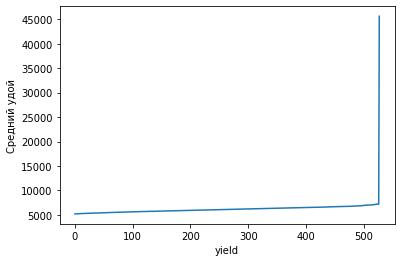

In [27]:
d = ferma_main.groupby('yield').mean()
plt.xlabel('yield')
plt.ylabel('Средний удой')
plt.plot(d.index)

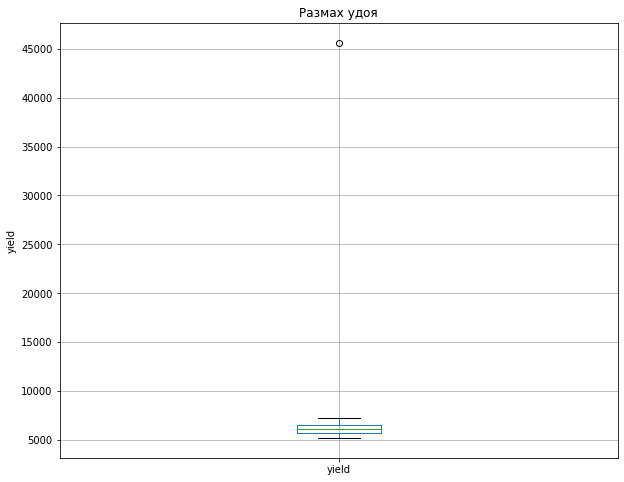

In [28]:
ferma_main.boxplot(column='yield', figsize=(10, 8))
plt.title('Размах удоя')

plt.ylabel('yield')
plt.show()

In [29]:

data= ferma_main['yield'][ferma_main['yield'] > 7500]
data.count()


1

In [30]:
data= ferma_main['yield'][ferma_main['yield']< 7500]
data.describe()
ferma_main['yield']=data

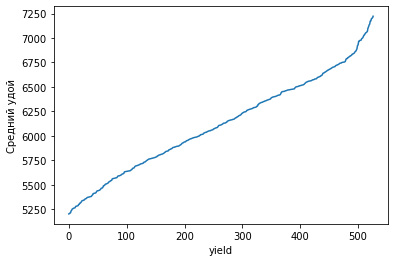

In [31]:
d = ferma_main.groupby('yield').mean()
plt.xlabel('yield')
plt.ylabel('Средний удой')
plt.plot(d.index)

<b>Вывод:</b>
Можнно сделать предварительный вывод о том что параметр удоя не обладает большим разбросом значений, так как в значительной степени обусловлен биологическими факторами.  
Присутсвует один яркий выброс почти в 7 раз больший ем среднее значение. Его устранил.  
Среднее значение соответсвует запросу заказчикаи, и отличается от минимального и максимального примерно на 1000 литров, однако большая часть значений сосредоточена именно близко к нему.


In [32]:
ferma_main['EKE'].describe()

count    629.000000
mean      14.543879
std        1.306408
min       10.900000
25%       13.500000
50%       14.700000
75%       15.600000
max       16.800000
Name: EKE, dtype: float64

(array([0.01347309, 0.        , 0.00673655, 0.04715583, 0.06736547,
        0.12125785, 0.10104821, 0.09431166, 0.16841368, 0.19535987,
        0.17515023, 0.25598879, 0.18862332, 0.26946188, 0.16167713,
        0.22230605, 0.38398319, 0.14820404, 0.2425157 , 0.37051009,
        0.28967153, 0.10778475, 0.26946188, 0.20883296, 0.1279944 ]),
 array([10.9  , 11.136, 11.372, 11.608, 11.844, 12.08 , 12.316, 12.552,
        12.788, 13.024, 13.26 , 13.496, 13.732, 13.968, 14.204, 14.44 ,
        14.676, 14.912, 15.148, 15.384, 15.62 , 15.856, 16.092, 16.328,
        16.564, 16.8  ]),
 <BarContainer object of 25 artists>)

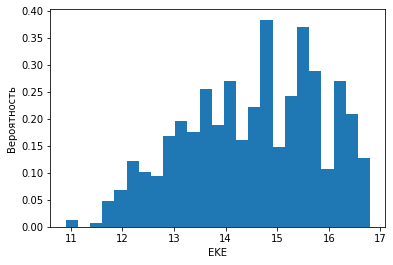

In [33]:
plt.xlabel('EKE')
plt.ylabel('Вероятность')
plt.hist(x=ferma_main['EKE'], bins=25, density=True)

In [34]:
ferma_main['protein_weight'].describe()

count     629.000000
mean     1923.364070
std       182.956251
min      1660.000000
25%      1771.000000
50%      1888.000000
75%      2062.000000
max      2349.000000
Name: protein_weight, dtype: float64

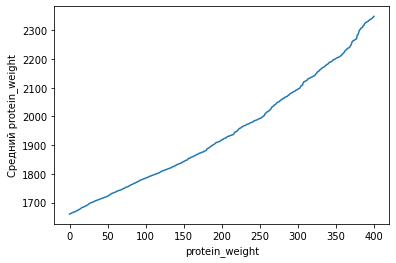

In [35]:
d = ferma_main.groupby('protein_weight').mean()
plt.xlabel('protein_weight')
plt.ylabel('Средний protein_weight')
plt.plot(d.index)

<b>Вывод:</b>
выбросов не имеется, это скорее всего вызвано едиными нормами рационов для всех коров, которые выдиваются в незначительные погрешности.

In [36]:
ferma_main['SPO'].describe()

count    629.000000
mean       0.913116
std        0.032203
min        0.840000
25%        0.890000
50%        0.930000
75%        0.940000
max        0.960000
Name: SPO, dtype: float64

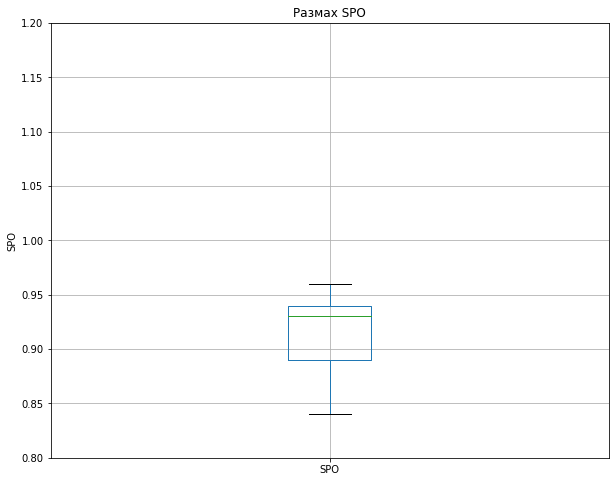

In [37]:
ferma_main.boxplot(column='SPO', figsize=(10, 8))
plt.title('Размах SPO')
plt.ylim(0.8 , 1.2)
plt.ylabel('SPO')
plt.show()

(array([ 8.28033916,  0.        ,  5.63063063,  0.        ,  8.28033916,
         0.        ,  0.        ,  0.        , 19.21038686,  4.9682035 ,
        31.13407525,  7.61791203,  0.33121357,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        , 46.70111288,  0.        ,
        56.96873344,  0.        , 18.21674616,  0.        ,  0.9936407 ]),
 array([0.84  , 0.8448, 0.8496, 0.8544, 0.8592, 0.864 , 0.8688, 0.8736,
        0.8784, 0.8832, 0.888 , 0.8928, 0.8976, 0.9024, 0.9072, 0.912 ,
        0.9168, 0.9216, 0.9264, 0.9312, 0.936 , 0.9408, 0.9456, 0.9504,
        0.9552, 0.96  ]),
 <BarContainer object of 25 artists>)

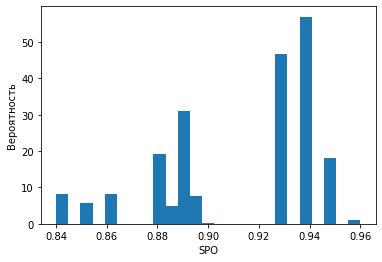

In [38]:
plt.xlabel('SPO')
plt.ylabel('Вероятность')
plt.hist(x=ferma_main['SPO'], bins=25, density=True)

<b>Вывод:</b>

выбросов не имеется, это скорее всего вызвано едиными нормами рационов для всех коров, которые выдиваются в незначительные погрешности.  
Как можно заметить данный вывод актуален для всех показателей кормов, что позволяет судить о довольно четком следовании определенным нормам.

РефлешнСоверинг    256
Вис Бик Айдиал     373
Name: breed, dtype: int64

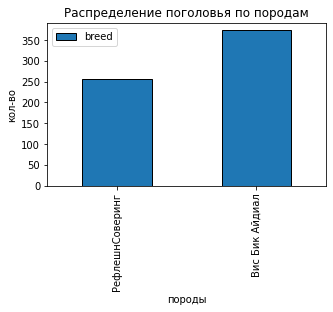

<Figure size 2880x1440 with 0 Axes>

In [39]:
analysis2(ferma_main, 'breed', 'Распределение поголовья по породам', 'породы', 'кол-во', 40)

<b>Вывод:</b>
Коров породы Вис Бик Айдиал больше, но не настолько чтобы разница в их количестве была подавляющей

Равнинное    278
Холмистое    351
Name: type, dtype: int64

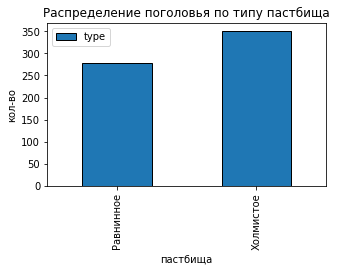

<Figure size 2880x1440 with 0 Axes>

In [40]:
ferma_main['type'] = ferma_main['type'].str.replace('Равнинные','Равнинное')
analysis2(ferma_main, 'type', 'Распределение поголовья по типу пастбища', 'пастбища', 'кол-во', 40)


<b>Вывод:</b>

Большая часть коров пасется на холмистых пастбищах

Соверин    311
Айдиал     318
Name: father_breed, dtype: int64

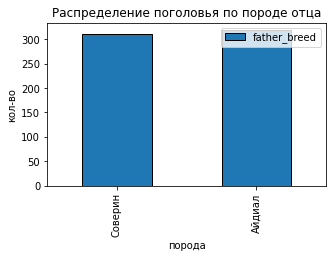

<Figure size 2880x1440 with 0 Axes>

In [41]:
ferma_main['father_breed'] = ferma_main['father_breed'].str.replace('Айдиалл','Айдиал')
analysis2(ferma_main, 'father_breed', 'Распределение поголовья по породе отца', 'порода', 'кол-во', 40)

<b>Вывод:</b>  
Можно судить о равном количестве потомства от племенных быков двух представленных видов

In [42]:
ferma_main['fat%'].describe()

count    629.000000
mean       3.603657
std        0.168656
min        2.990000
25%        3.590000
50%        3.650000
75%        3.720000
max        3.750000
Name: fat%, dtype: float64

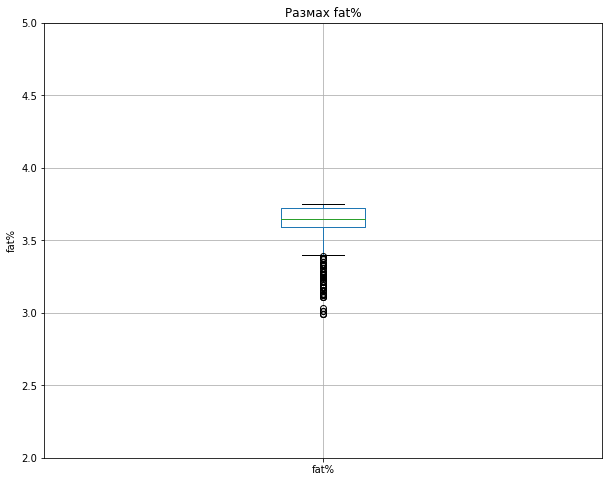

In [43]:

ferma_main.boxplot(column='fat%', figsize=(10, 8))
plt.title('Размах fat%')
plt.ylim(2,5, 4)
plt.ylabel('fat%')
plt.show()


(array([ 0.26148439,  0.05229688,  0.        ,  0.15689064,  0.36607815,
         0.15689064,  0.52296879,  0.57526567,  0.41837503,  0.78445318,
         0.15689064,  0.78445318,  0.26148439,  0.20918752,  0.78445318,
         0.        ,  0.78445318,  0.31378127,  0.15689064,  2.24876579,
         3.45159401,  4.81131286,  0.        ,  4.81131286, 10.82545394]),
 array([2.99  , 3.0204, 3.0508, 3.0812, 3.1116, 3.142 , 3.1724, 3.2028,
        3.2332, 3.2636, 3.294 , 3.3244, 3.3548, 3.3852, 3.4156, 3.446 ,
        3.4764, 3.5068, 3.5372, 3.5676, 3.598 , 3.6284, 3.6588, 3.6892,
        3.7196, 3.75  ]),
 <BarContainer object of 25 artists>)

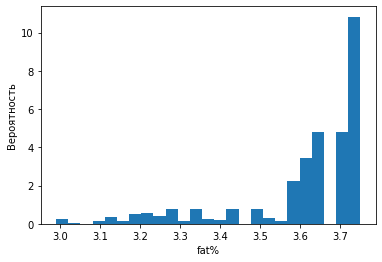

In [44]:
plt.xlabel('fat%')
plt.ylabel('Вероятность')
plt.hist(x=ferma_main['fat%'], bins=25, density=True)

<b>Вывод:</b>

Можно судить о том что средний процент жирности у молока стабилен, однако присутсвует некоторое количество маложирных образцов, которые однако укладываются в нормы для этого напитка.

In [45]:
ferma_main['protein%'].describe()

count    629.000000
mean       3.075671
std        0.002549
min        3.069000
25%        3.074000
50%        3.076000
75%        3.077000
max        3.085000
Name: protein%, dtype: float64

(array([  2.48410175,  27.32511924,   0.        ,  52.16613672,
         94.39586645,   0.        , 146.56200318, 181.33942766,
          0.        , 223.56915739, 255.86248013,   0.        ,
        196.24403816,   0.        , 166.43481717, 124.20508744,
          0.        ,  54.65023847,  27.32511924,   0.        ,
          4.9682035 ,   0.        ,   0.        ,   0.        ,
          4.9682035 ]),
 array([3.069  , 3.06964, 3.07028, 3.07092, 3.07156, 3.0722 , 3.07284,
        3.07348, 3.07412, 3.07476, 3.0754 , 3.07604, 3.07668, 3.07732,
        3.07796, 3.0786 , 3.07924, 3.07988, 3.08052, 3.08116, 3.0818 ,
        3.08244, 3.08308, 3.08372, 3.08436, 3.085  ]),
 <BarContainer object of 25 artists>)

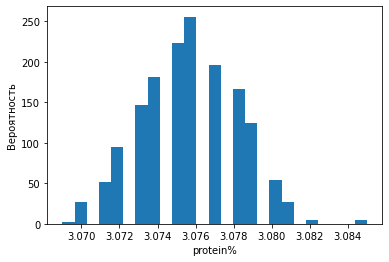

In [46]:
plt.xlabel('protein%')
plt.ylabel('Вероятность')
plt.hist(x=ferma_main['protein%'], bins=25, density=True)

<b>Вывод:</b>  
Ситуация аналогична с жирностью и полностью обьясняется единнообразием в кормах для коров.

не вкусно    258
вкусно       371
Name: taste, dtype: int64

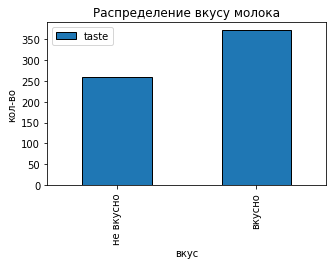

<Figure size 2880x1440 with 0 Axes>

In [47]:
analysis2(ferma_main, 'taste', 'Распределение вкусу молока', 'вкус', 'кол-во', 40)

<b>Вывод:</b>

В среднем большая часть молока оценивается как вкусная, однако эту оценка в значительной степени субъективна.

менее_2_лет    110
более_2_лет    519
Name: age, dtype: int64

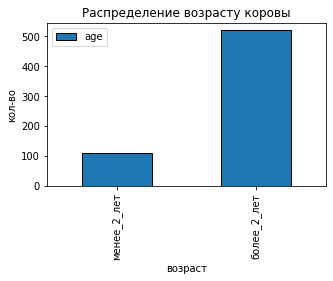

<Figure size 2880x1440 with 0 Axes>

In [48]:
analysis2(ferma_main, 'age', 'Распределение возрасту коровы', 'возраст', 'кол-во', 40)

<b>Вывод:</b>  
Большая часть коров старше двух лет, что оправдано процессом взросления и тем что молодые особи менее приспособлены к производству молока чем полноценно выросшие

Геркулес     64
Соловчик    110
Буйный      215
Барин       240
Name: father_name, dtype: int64

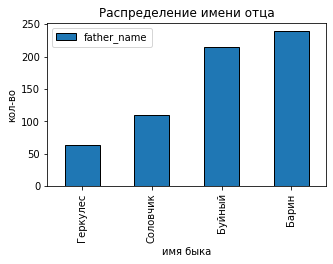

<Figure size 2880x1440 with 0 Axes>

In [49]:
analysis2(ferma_main, 'father_name', 'Распределение имени отца', 'имя быка', 'кол-во', 40)

<b>Вывод:</b> Наиболее популярны имена Буйный и Барин, возможно это один бык-производитель с наиболее высокой "производительностью"

<b>Вывод общий по таблице:</b>

Большая часть данных не имеет выбросов, что скорее всего вызвано тщательным их внесением в табилицу и соблюдением норм при обслуживании животных, из за чего показатели не выбиваются из установленных производителем границ

### Анализ таблицы cow_buy

In [50]:
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   breed         16 non-null     object 
 1   type          16 non-null     object 
 2   father_breed  16 non-null     object 
 3   father_name   16 non-null     object 
 4   fat%          16 non-null     float64
 5   protein%      16 non-null     float64
 6   age           16 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.0+ KB


Вис Бик Айдиал     8
РефлешнСоверинг    8
Name: breed, dtype: int64

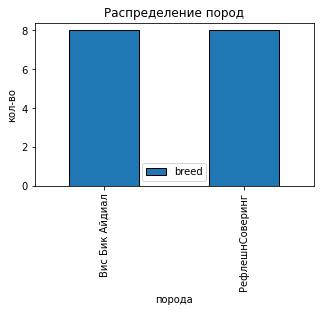

<Figure size 2880x1440 with 0 Axes>

In [51]:
analysis2(cow_buy, 'breed', 'Распределение пород', 'порода', 'кол-во', 40)

равнинное    8
холмистое    8
Name: type, dtype: int64

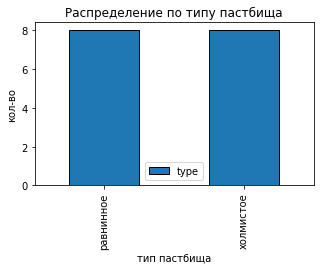

<Figure size 2880x1440 with 0 Axes>

In [52]:
analysis2(cow_buy, 'type', 'Распределение по типу пастбища', 'тип пастбища', 'кол-во', 40)

Айдиал      6
Соверин    10
Name: father_breed, dtype: int64

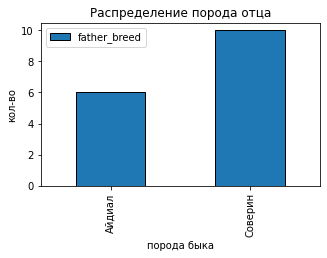

<Figure size 2880x1440 with 0 Axes>

In [53]:
analysis2(cow_buy, 'father_breed', 'Распределение порода отца', 'порода быка', 'кол-во', 40)

Соловчик    2
Барин       2
Геркулес    5
Буйный      7
Name: father_name, dtype: int64

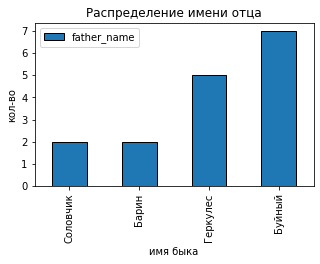

<Figure size 2880x1440 with 0 Axes>

In [54]:
analysis2(cow_buy, 'father_name', 'Распределение имени отца', 'имя быка', 'кол-во', 40)

(array([ 3.63372093,  0.        ,  0.        , 10.90116279,  3.63372093,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  3.63372093,  0.        ,  7.26744186,  3.63372093,
         0.        ,  3.63372093,  3.63372093,  0.        ,  3.63372093,
         0.        ,  0.        , 10.90116279,  0.        ,  3.63372093]),
 array([3.34  , 3.3572, 3.3744, 3.3916, 3.4088, 3.426 , 3.4432, 3.4604,
        3.4776, 3.4948, 3.512 , 3.5292, 3.5464, 3.5636, 3.5808, 3.598 ,
        3.6152, 3.6324, 3.6496, 3.6668, 3.684 , 3.7012, 3.7184, 3.7356,
        3.7528, 3.77  ]),
 <BarContainer object of 25 artists>)

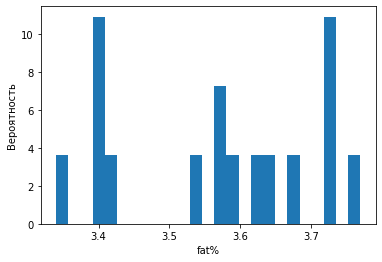

In [55]:
plt.xlabel('fat%')
plt.ylabel('Вероятность')
plt.hist(x=cow_buy['fat%'], bins=25, density=True)

In [56]:
cow_buy['fat%'].describe()

count    16.000000
mean      3.571875
std       0.141620
min       3.340000
25%       3.415000
50%       3.585000
75%       3.692500
max       3.770000
Name: fat%, dtype: float64

(array([ 44.64285714,   0.        ,   0.        ,   0.        ,
          0.        ,  89.28571429,  44.64285714,   0.        ,
          0.        ,   0.        ,  44.64285714,   0.        ,
          0.        ,  44.64285714,   0.        ,   0.        ,
         44.64285714,   0.        ,   0.        ,  44.64285714,
        133.92857143,  44.64285714,   0.        , 133.92857143,
         44.64285714]),
 array([3.046 , 3.0474, 3.0488, 3.0502, 3.0516, 3.053 , 3.0544, 3.0558,
        3.0572, 3.0586, 3.06  , 3.0614, 3.0628, 3.0642, 3.0656, 3.067 ,
        3.0684, 3.0698, 3.0712, 3.0726, 3.074 , 3.0754, 3.0768, 3.0782,
        3.0796, 3.081 ]),
 <BarContainer object of 25 artists>)

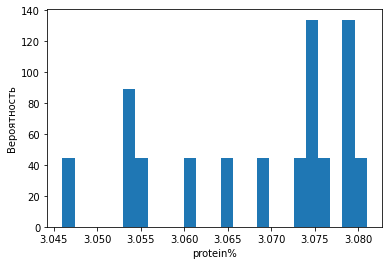

In [57]:
plt.xlabel('protein%')
plt.ylabel('Вероятность')
plt.hist(x=cow_buy['protein%'], bins=25, density=True)

In [58]:
cow_buy['protein%'].describe()

count    16.000000
mean      3.068250
std       0.011264
min       3.046000
25%       3.059500
50%       3.073500
75%       3.076750
max       3.081000
Name: protein%, dtype: float64

<b>Вывод:</b>

Все проблемы актуальные для первой таблицы подходят и к этой, однако также стоит заметить что малое количство данных, а также то что их явно тщательно заполняли создает впечатление о тщательной подготовке информации перед продажей коров.

## Корреляционный анализ

Целевые признаки Удой и Вкус молока 
входные признаки:  
Порода  
Возраст
тип пастбища  
Жирность  
Белок  
ЭКЕ  
Сырой протеин
СПО  

In [59]:
def a12(data, chapter, first, second):
    data[chapter]= data[chapter].str.replace(first,'0')
    data[chapter]= data[chapter].str.replace(second,'1')
    

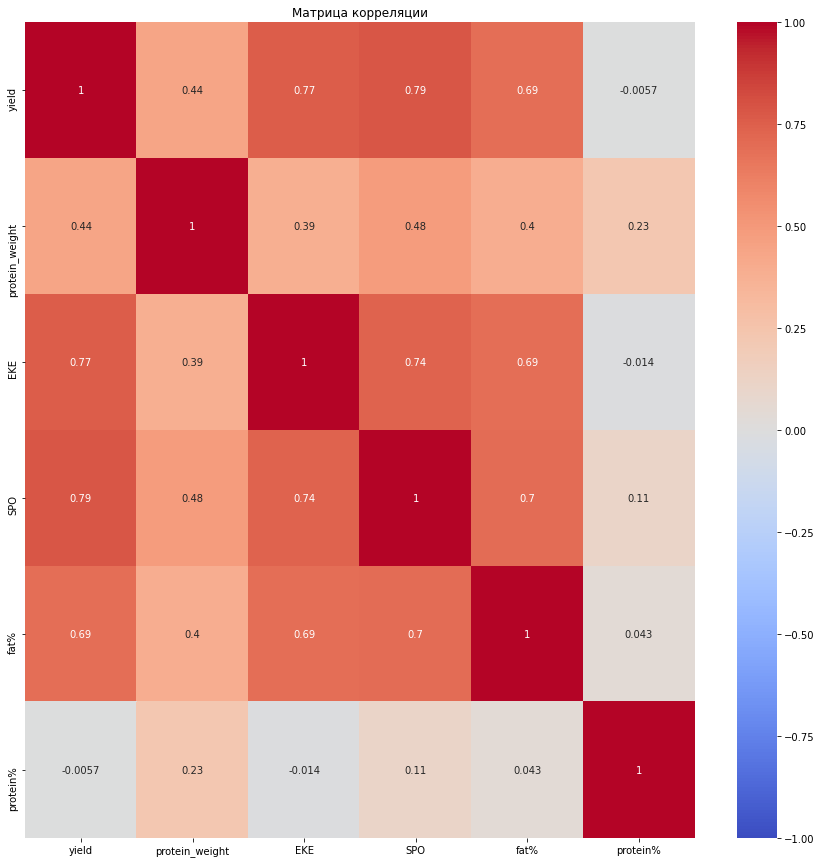

,yield,protein_weight,EKE,SPO,fat%,protein%
yield,1.000000,0.437543,0.765144,0.787904,0.688506,-0.005701
protein_weight,0.437543,1.000000,0.387436,0.484731,0.395286,0.228104
EKE,0.765144,0.387436,1.000000,0.740029,0.688273,-0.013803
SPO,0.787904,0.484731,0.740029,1.000000,0.699606,0.109788
fat%,0.688506,0.395286,0.688273,0.699606,1.000000,0.042541
protein%,-0.005701,0.228104,-0.013803,0.109788,0.042541,1.000000


In [60]:
ferma_maina=ferma_main
 



parametres = [
    'yield',
    'protein_weight',
    'EKE',
    'SPO',
    'fat%',
    'protein%',
    
    'age',
    'type',
    'breed',
    'taste',
    
    ]
corr_matrix = ferma_maina[parametres].corr(method='spearman')
plt.figure(figsize = (15, 15))
sns.heatmap(corr_matrix, vmin=-1, vmax=1,
            cmap='coolwarm', annot=True,
            )
plt.title('Матрица корреляции')
plt.show()
display(corr_matrix)

<b>Вывод:</b>  

Целевой признак удой проявляет наибольщую зависимость от ЕКЕ и СПО, а также от веса белка в корме, значит можно сделать вывод о том что наиболее критичными являются именно параметры корма. 

Целевой признак вкус также наиболее зависим от параметров корма, однако также присутсвет зависимость от удоя и процента белка, однако эти зависимости не столь сильны как у первого целевого.

In [61]:
def arar(data,  second,O,X,Y ):
    data.plot(x='yield', y =second, kind ='scatter', figsize=(12, 8), legend=True, alpha = 0.25)
    plt.title(O)
    plt.xlabel(X)
    plt.ylabel(Y)
    #plt.ylim(0, 800)
    plt.show()
def arar1(data,  second,O,X,Y ):
    data.plot(x='taste', y =second, kind ='scatter', figsize=(12, 8), legend=True, alpha = 0.25)
    plt.title(O)
    plt.xlabel(X)
    plt.ylabel(Y)
    #plt.xlim(0, 1)
    #plt.ylim(0, 800)
    plt.show()
    
 

array([<AxesSubplot:title={'center':'вкусно'}>,
       <AxesSubplot:title={'center':'не вкусно'}>], dtype=object)

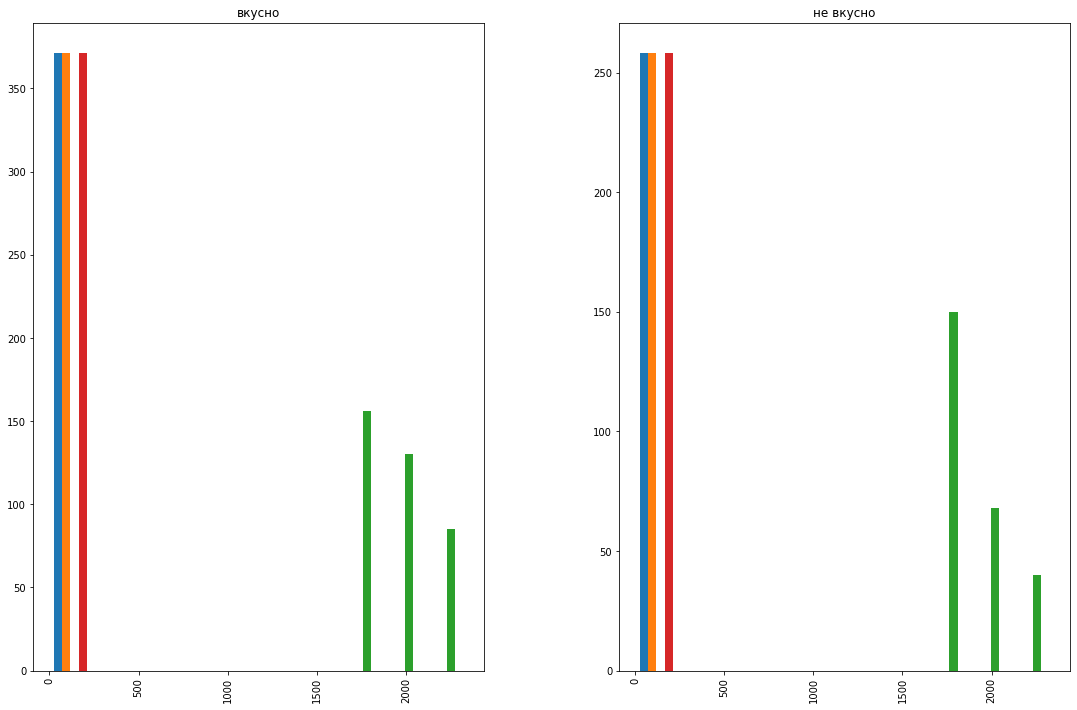

In [62]:
ferma_main[['taste', 'SPO','EKE','protein_weight','protein%']].hist(by='taste', figsize=(18, 12))

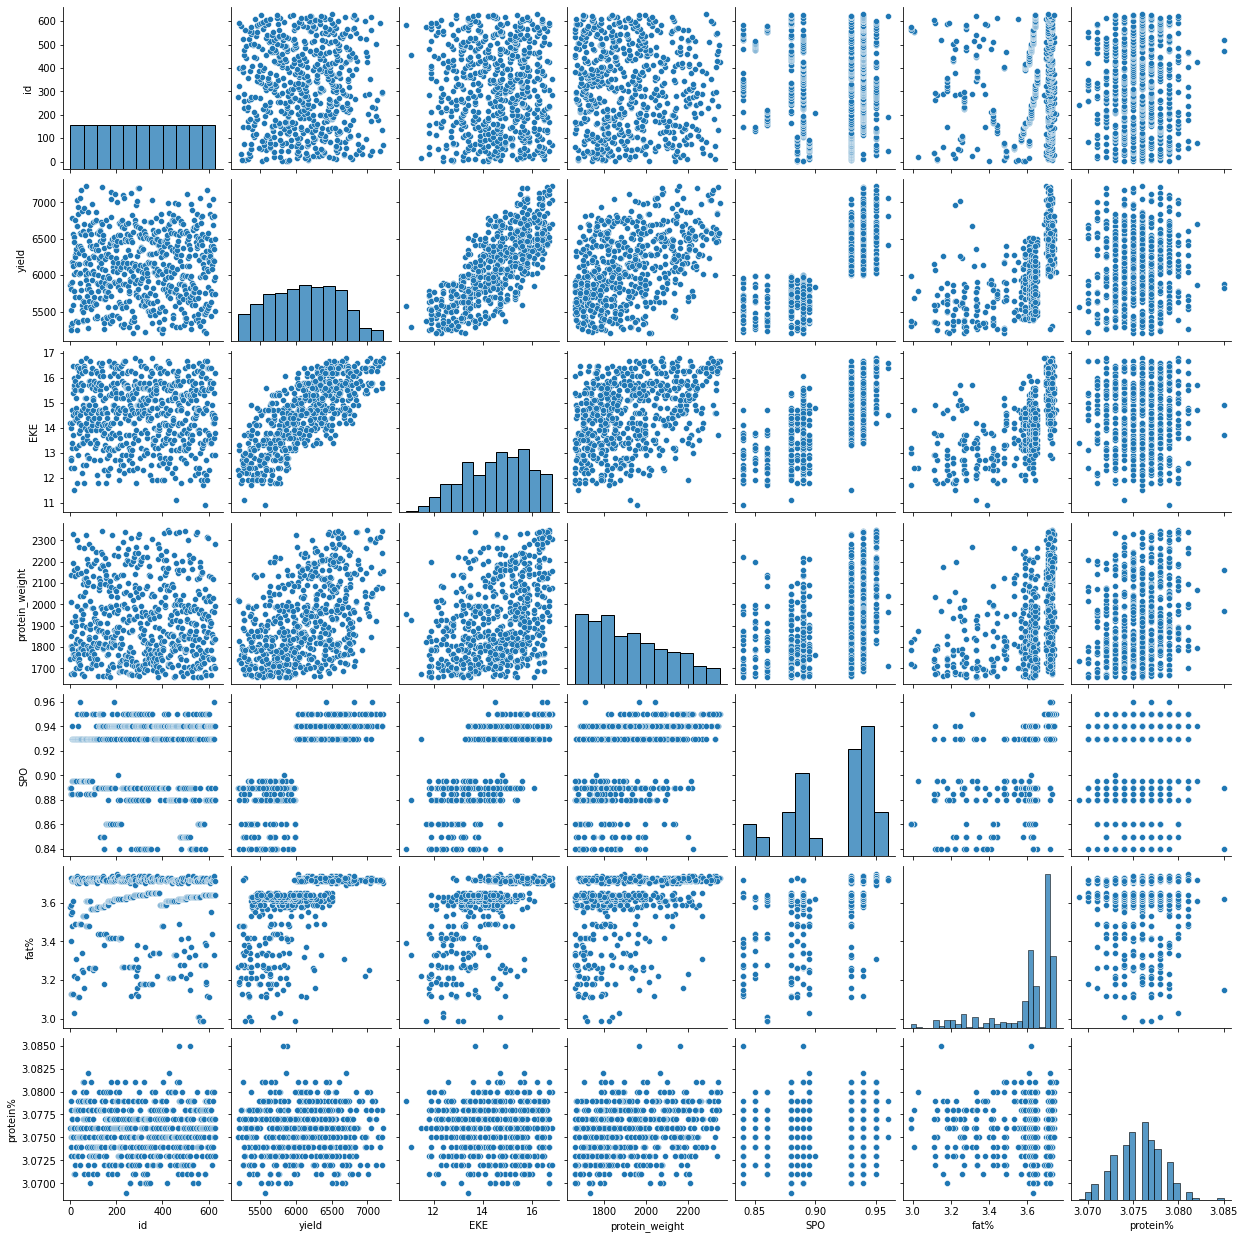

In [63]:
sns.pairplot(ferma_main)

<b>Вывод:</b>  
Можно сказать о том что зависимость между удоем и ЕКЕ сильна, наиболее распространенные значения между  130-160 г и 6000 и 6750 литрами. 

Зависимость вкуса от ЕКЕ весьма сомнительна, однако можно заметить что большая часть отметок о хорошем вкусе сосредоточена при больших значениях ЕКЕ

<b>Вывод:</b>  
Можно сказать о том что зависимость между удоем и СПО сильна. Как показывает график существует прямая зависимость, так при значениях меньше 90% вероятность преодолеть  порог в 6000 литров стремится к 0

Зависимость вкуса от СПО сомнительна.

<b>Вывод:</b>  
Корреляционный анализ позволил сделать выводы о том что целевые признаки имеют зависимость от нескольких входных, что можно будет использовать в дальнейшем анализе.
Удой зависитв наибольшей степени от показателей корма коровы (СПО, ЕКЕ, вес сырого протеина), возраста коровы ,а также от итоговой жирности молока.  
Вкус же в свою очередь зависим от множества факторов в которые входят как показатели корма, так и возраст коровы, ее порода и место выпаса. Скорее всего это связано с тем что на него влияние оказвыает в большей степени общее состояние животного, а не только его рацион.


## Обучение модели линейной регрессии

### Постройте модель линейной регрессии на данных датасета 

In [68]:
def d1(a, b, cat_col):  
    
    encoder = OneHotEncoder(drop='first', sparse=False)
    X_train_ohe = encoder.fit_transform(a[cat_col])
    X_test_ohe = encoder.transform(b[cat_col])

    encoder_col_names = encoder.get_feature_names()
    
    X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
    X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)
    
    return X_test_ohe, X_train_ohe


def d2(a, b,num_col):
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(a[num_col])
    X_test_scaled = scaler.transform(b[num_col])

    X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)
    
    return X_test_scaled, X_train_scaled
    
def d3(X_train_ohe, X_test_ohe, X_train_scaled , X_test_scaled):
    
    X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
    X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)
    
    return X_train, X_test
    


In [69]:
def dsdad(X_train, X_test, num_col,cat_col):  
    
    encoder = OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore')
    X_train_ohe = encoder.fit_transform(X_train[cat_col])
    X_test_ohe = encoder.transform(X_test[cat_col])

    encoder_col_names = encoder.get_feature_names_out() # в новой версии называется чуть иначе, с _out на конце
    
    X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
    X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)


    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train[num_col])
    X_test_scaled = scaler.transform(X_test[num_col])

    X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)
    

    
    X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
    X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)
    model_lr  = LinearRegression()
    model_lr.fit(X_train, y_train)
    
    return model_lr, X_train, X_test,encoder,scaler # РЕВЬЮЕР: добавил датасеты в return

In [70]:
RANDOM_STATE = 42
ferma_mainR=ferma_main[['yield','SPO','EKE','protein_weight', 'breed','type']]
#a12(ferma_mainR, 'type', 'Равнинное', 'Холмистое')
#ferma_mainR['type'] = ferma_mainR['type'].astype('float64')
#a12(ferma_mainR, 'breed', 'РефлешнСоверинг', 'Вис Бик Айдиал')
#ferma_mainR['breed'] = ferma_mainR['breed'].astype('float64')

ferma_mainR = ferma_mainR.replace([np.inf, -np.inf], np.nan)
ferma_mainR = ferma_mainR.dropna()
ferma_mainR = ferma_mainR.reset_index()

X = ferma_mainR.drop('yield', axis=1)
y = ferma_mainR['yield']

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE
)

cat_col_names = ['breed', 'type']
num_col_names = ['SPO','EKE','protein_weight' ]

#d1(X_train, X_test, cat_col_names)

In [73]:
model_lr, X_train, X_test ,encoder,scaler= dsdad(X_train, X_test, ['SPO','EKE','protein_weight' ],['breed', 'type'])

# В этой версии функции ошибка выскаивает позже: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.
## Если ограничивать ее работу получением обработанной тестовой и учебной выборок то перестает корреткно работать скалер

predictions = model_lr.predict(X_test)

# вывод первых предсказанного и настоящего значений


mae1 = mean_absolute_error(y_test, predictions) 
print(mae1)

mse1 = mean_squared_error(y_test, predictions)
print(mse1)


rmse1 = mean_squared_error(y_test, predictions, squared=False) 
print(rmse1)
r2_lr1 = r2_score(y_test, predictions)  

print("R2.1 LinearRegression =", r2_lr1)

192.7702930407748
58096.85145819702
241.03288459917044
R2.1 LinearRegression = 0.7146028954420609


/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


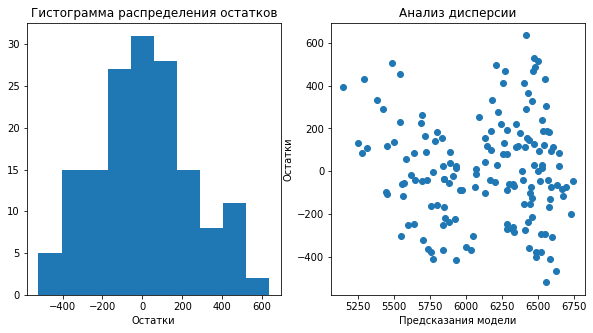

In [77]:
residuals = y_test - predictions

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(predictions,residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

### Модель линейной регрессии с учётом преобразования признаков, нелинейно связанных с целевым признаком.

<AxesSubplot:title={'center':'Диаграмма рассеяния для величин СПО и удой'}, xlabel='yield', ylabel='SPO'>

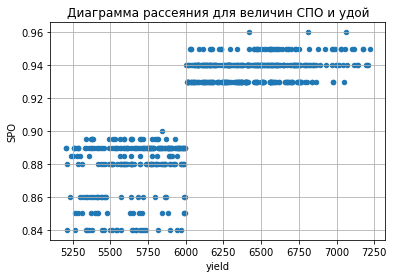

In [78]:
#определяем границу нелинейности
ferma_main[ferma_main['yield'] < 40000].plot(x='yield', y='SPO', kind='scatter', grid=True, title = 'Диаграмма рассеяния для величин СПО и удой')

Порог регрессии устанавливаем на 0.91. 
Так как после этого значения СПО удой начинает соответсвовать требованиям, предствляемыми заказчиком.

In [79]:
def a13(row):
    if row <= 0.91:
        return '0'
    else:
        return '1'
 

In [80]:
RANDOM_STATE = 42
ferma_main2=ferma_main[['yield','SPO','EKE','protein_weight', 'breed','type']]

ferma_main2['EKE2']=ferma_main2['EKE']**2
ferma_main2['SPO'] = ferma_main2['SPO'].apply(a13)
#ferma_main2['SPO'] = np.where(ferma_main2['SPO'] < 0.91, 0, 1)

ferma_main2=ferma_main2[['yield','SPO','EKE2','protein_weight', 'breed','type']]

ferma_main2 = ferma_main2.replace([np.inf, -np.inf], np.nan)
ferma_main2 = ferma_main2.dropna()
ferma_main2 = ferma_main2.reset_index()


X = ferma_main2.drop('yield', axis=1)
y = ferma_main2['yield']

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE
)

cat_col_names = ['SPO','breed', 'type']
num_col_names = ['EKE2','protein_weight' ]

model_lr2, X_train, X_test,encoder,scaler = dsdad(X_train, X_test, num_col_names, cat_col_names) 
 
predictions = model_lr2.predict(X_test)

# вывод первых предсказанного и настоящего значений
#print(predictions)
r2_lr2 = r2_score(y_test, predictions)  




/tmp/ipykernel_772/2323214419.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ferma_main2['EKE2']=ferma_main2['EKE']**2
/tmp/ipykernel_772/2323214419.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ferma_main2['SPO'] = ferma_main2['SPO'].apply(a13)
/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  w

In [81]:
mse2 = mean_squared_error(y_test, predictions)
print(mse2)
mae2 = mean_absolute_error(y_test, predictions) 
print(mae2)
rmse2 = mean_squared_error(y_test, predictions, squared=False) 
print(rmse2)
r2_lr2 = r2_score(y_test, predictions)  
print("R2.2 LinearRegression =", r2_lr2)

49645.484178993065
180.10410850567592
222.81266610988044
R2.2 LinearRegression = 0.7561197021278077


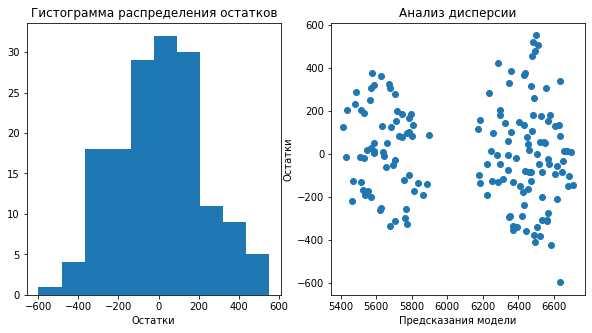

In [82]:

residuals = y_test - predictions
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5) )
axes[0].hist(residuals)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(predictions,residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

### Постройте модель линейной регрессии с учётом нового признака

In [83]:
RANDOM_STATE = 42
ferma_main3=ferma_main[['yield','SPO','EKE','protein_weight', 'breed','type','father_name']]

ferma_main3 = ferma_main3.replace([np.inf, -np.inf], np.nan)
ferma_main3 = ferma_main3.dropna()
ferma_main3 = ferma_main3.reset_index()

ferma_main3['EKE2']=ferma_main3['EKE']**2
ferma_main3['SPO'] = ferma_main3['SPO'].apply(a13)

ferma_main3=ferma_main3[['yield','SPO','EKE2','protein_weight', 'breed','type','father_name']]


X = ferma_main3.drop('yield', axis=1)
y = ferma_main3['yield']

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE
)

cat_col_names = ['SPO','breed', 'type','father_name']
num_col_names = ['EKE2','protein_weight' ]


model_lr3, X_train, X_test,encoder,scaler = dsdad(X_train, X_test, num_col_names, cat_col_names) 

#X_test = np.nan_to_num(X_test)
# предсказанные значения для X_test
predictions = model_lr3.predict(X_test)
mse3 = mean_squared_error(y_test, predictions)
print(mse3)
mae3 = mean_absolute_error(y_test, predictions) 
print(mae3)

rmse3 = mean_squared_error(y_test, predictions, squared=False) 
print(rmse3)
# вывод первых предсказанного и настоящего значений
#print(predictions)
  

42296.82026191926
162.88886779728145
205.6619076589519


/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


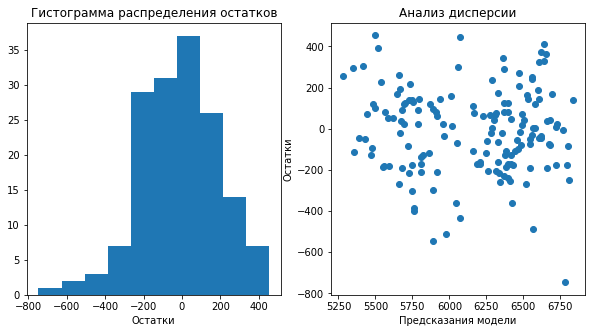

In [84]:

residuals = y_test - predictions
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5) )
axes[0].hist(residuals)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(predictions,residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

In [85]:
r2_lr3 = r2_score(y_test, predictions)

print("R2.3 LinearRegression =", r2_lr3)


R2.3 LinearRegression = 0.7922195483614947


In [86]:
print(mae1)
print(mae2)
print(mae3)

192.7702930407748
180.10410850567592
162.88886779728145


In [87]:
print(mse1)
print(mse2)
print(mse3)

58096.85145819702
49645.484178993065
42296.82026191926


In [88]:
print(rmse1)
print(rmse1)
print(rmse2)

241.03288459917044
241.03288459917044
222.81266610988044


In [89]:
print("R2.1 LinearRegression =", r2_lr1)
print("R2.2 LinearRegression =", r2_lr2)
print("R2.3 LinearRegression =", r2_lr3)


R2.1 LinearRegression = 0.7146028954420609
R2.2 LinearRegression = 0.7561197021278077
R2.3 LinearRegression = 0.7922195483614947


<b>Вывод:</b>  
Можно судить о том что последняя из созданных моделей наиболее приспособлена для анализа, пожтому дальше используем ее.

### Примените лучшую по качеству и по точности модель к данным из датасета cow_buy.csv

In [90]:

display(cow_buy)
display(ferma_main.head(15))

,breed,type,father_breed,father_name,fat%,protein%,age
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет
6,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет
7,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет
8,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.73,3.055,более_2_лет
9,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.73,3.073,более_2_лет


,id,yield,EKE,protein_weight,SPO,breed,type,father_breed,fat%,protein%,taste,age,father_name
0,1,5863.0,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,Буйный
1,2,5529.0,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,Соловчик
2,3,5810.0,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,Барин
3,4,5895.0,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,Буйный
4,5,5302.0,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,Барин
5,6,5254.0,12.7,1806,0.885,РефлешнСоверинг,Холмистое,Соверин,3.13,3.078,вкусно,менее_2_лет,Барин
6,7,5910.0,13.2,1792,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.48,3.077,вкусно,более_2_лет,Соловчик
7,8,6179.0,14.7,1806,0.930,Вис Бик Айдиал,Равнинное,Айдиал,3.55,3.076,вкусно,более_2_лет,Геркулес
8,9,6783.0,14.2,1918,0.940,РефлешнСоверинг,Холмистое,Айдиал,3.71,3.077,вкусно,более_2_лет,Буйный
9,10,5339.0,13.4,1791,0.895,Вис Бик Айдиал,Холмистое,Соверин,3.13,3.075,вкусно,менее_2_лет,Барин


In [91]:




    a1=ferma_main.query(" breed == 'Вис Бик Айдиал' and father_breed == 'Соверин' ")
    a2=ferma_main.query(" breed == 'Вис Бик Айдиал' and father_breed == 'Айдиал' ")
    a3=ferma_main.query(" breed == 'РефлешнСоверинг' and father_breed == 'Соверин' ")
    a4=ferma_main.query(" breed == 'РефлешнСоверинг' and father_breed == 'Айдиал' ")
    
    val_1=a1['yield'].mean()*1.05
    val_2=a2['yield'].mean()*1.05
    val_3=a3['yield'].mean()*1.05
    val_4=a4['yield'].mean()*1.05    
    
    print('val1=', val_1)
    print('val2=', val_2)
    print('val3=', val_3)
    print('val4=', val_4)

val1= 6205.445375722543
val2= 6577.316080402011
val3= 6270.569565217392
val4= 6709.295338983051


In [92]:


def farrr(alfa):
    if alfa['breed'] == 'Вис Бик Айдиал' and alfa['father_breed'] == 'Соверин' :
        val= val_1
    elif  alfa['breed'] == 'Вис Бик Айдиал' and alfa['father_breed'] == 'Айдиал' :
        val= val_2
    elif  alfa['breed'] == 'РефлешнСоверинг' and alfa['father_breed'] == 'Соверин' :
        val= val_3    
    else:
        val= val_3
  
    return val


In [93]:
#farrr(cow_buy)
cow_buy['yield'] = cow_buy.apply (farrr, axis=1)

In [94]:
display(cow_buy)

,breed,type,father_breed,father_name,fat%,protein%,age,yield
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,6577.316080
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,6205.445376
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,6270.569565
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,6270.569565
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,6270.569565
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,6270.569565
6,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,6205.445376
7,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,6270.569565
8,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.73,3.055,более_2_лет,6205.445376
9,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.73,3.073,более_2_лет,6270.569565


In [95]:
'SPO','EKE'

('SPO', 'EKE')

In [96]:
val_1=a1['SPO'].mean()*1.05
val_2=a2['SPO'].mean()*1.05
val_3=a3['SPO'].mean()*1.05
val_4=a4['SPO'].mean()*1.05    



cow_buy['SPO'] = cow_buy.apply (farrr, axis=1)

In [97]:
val_1=a1['EKE'].mean()*1.05
val_2=a2['EKE'].mean()*1.05
val_3=a3['EKE'].mean()*1.05
val_4=a4['EKE'].mean()*1.05    



cow_buy['EKE'] = cow_buy.apply (farrr, axis=1)

In [98]:
display(cow_buy)

,breed,type,father_breed,father_name,fat%,protein%,age,yield,SPO,EKE
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,6577.316080,0.963926,15.305325
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,6205.445376,0.949127,14.988902
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,6270.569565,0.954092,15.325435
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,6270.569565,0.954092,15.325435
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,6270.569565,0.954092,15.325435
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,6270.569565,0.954092,15.325435
6,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,6205.445376,0.949127,14.988902
7,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,6270.569565,0.954092,15.325435
8,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.73,3.055,более_2_лет,6205.445376,0.949127,14.988902
9,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.73,3.073,более_2_лет,6270.569565,0.954092,15.325435


In [99]:
cow_buy['type'] = cow_buy['type'].str.replace('равнинное','Равнинное')
cow_buy['type'] = cow_buy['type'].str.replace('холмистое','Холмистое')

In [100]:
val_1=a1['protein_weight'].mean()*1.05
val_2=a2['protein_weight'].mean()*1.05
val_3=a3['protein_weight'].mean()*1.05
val_4=a4['protein_weight'].mean()*1.05   


#cow_buy['SPO'] = cow_buy['SPO'].apply(a13)
cow_buy['protein_weight'] = cow_buy.apply (farrr, axis=1)
cow_buy['EKE2'] = cow_buy['EKE']**2
cow_buy=np.round(cow_buy, decimals = 2)
display(cow_buy)

,breed,type,father_breed,father_name,fat%,protein%,age,yield,SPO,EKE,protein_weight,EKE2
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.08,более_2_лет,6577.32,0.96,15.31,2017.24,234.25
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.08,менее_2_лет,6205.45,0.95,14.99,2018.99,224.67
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.07,более_2_лет,6270.57,0.95,15.33,2017.96,234.87
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.06,более_2_лет,6270.57,0.95,15.33,2017.96,234.87
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.07,более_2_лет,6270.57,0.95,15.33,2017.96,234.87
5,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.63,3.05,менее_2_лет,6270.57,0.95,15.33,2017.96,234.87
6,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.08,более_2_лет,6205.45,0.95,14.99,2018.99,224.67
7,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.08,менее_2_лет,6270.57,0.95,15.33,2017.96,234.87
8,Вис Бик Айдиал,Холмистое,Соверин,Соловчик,3.73,3.06,более_2_лет,6205.45,0.95,14.99,2018.99,224.67
9,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.73,3.07,более_2_лет,6270.57,0.95,15.33,2017.96,234.87


In [101]:
cow_buy=cow_buy.dropna()
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 0 to 15
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   breed           16 non-null     object 
 1   type            16 non-null     object 
 2   father_breed    16 non-null     object 
 3   father_name     16 non-null     object 
 4   fat%            16 non-null     float64
 5   protein%        16 non-null     float64
 6   age             16 non-null     object 
 7   yield           16 non-null     float64
 8   SPO             16 non-null     float64
 9   EKE             16 non-null     float64
 10  protein_weight  16 non-null     float64
 11  EKE2            16 non-null     float64
dtypes: float64(7), object(5)
memory usage: 1.6+ KB


In [102]:
cow_buy1=cow_buy

cat_col_names = ['SPO','breed', 'type','father_name']
num_col_names = ['EKE2','protein_weight' ]

#encoder = OneHotEncoder(drop='first', sparse=False)
cow_buy_ohe = encoder.fit_transform(cow_buy1[cat_col_names])


encoder_col_names = encoder.get_feature_names_out() # РЕВЬЮЕР: и тут тоже _out()

#scaler = StandardScaler()
cow_buy_scaled = scaler.fit_transform(cow_buy1[num_col_names])

cow_buy_ohe = pd.DataFrame(cow_buy_ohe, columns=encoder_col_names)


cow_buy_scaled = pd.DataFrame(cow_buy_scaled, columns=num_col_names)


cow_buy1111 = pd.concat([cow_buy_ohe, cow_buy_scaled], axis=1)

cow_buy1111.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SPO_0.96               16 non-null     float64
 1   breed_РефлешнСоверинг  16 non-null     float64
 2   type_Холмистое         16 non-null     float64
 3   father_name_Буйный     16 non-null     float64
 4   father_name_Геркулес   16 non-null     float64
 5   father_name_Соловчик   16 non-null     float64
 6   EKE2                   16 non-null     float64
 7   protein_weight         16 non-null     float64
dtypes: float64(8)
memory usage: 1.1 KB


/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [103]:
display(cow_buy1111)

,SPO_0.96,breed_РефлешнСоверинг,type_Холмистое,father_name_Буйный,father_name_Геркулес,father_name_Соловчик,EKE2,protein_weight
0,1.0,0.0,1.0,0.0,1.0,0.0,0.672373,-1.659809
1,0.0,0.0,0.0,1.0,0.0,0.0,-1.289953,1.198411
2,0.0,1.0,0.0,0.0,0.0,0.0,0.799371,-0.483856
3,0.0,1.0,1.0,1.0,0.0,0.0,0.799371,-0.483856
4,0.0,1.0,0.0,1.0,0.0,0.0,0.799371,-0.483856
5,0.0,1.0,0.0,0.0,1.0,0.0,0.799371,-0.483856
6,0.0,0.0,0.0,1.0,0.0,0.0,-1.289953,1.198411
7,0.0,1.0,1.0,1.0,0.0,0.0,0.799371,-0.483856
8,0.0,0.0,1.0,0.0,0.0,1.0,-1.289953,1.198411
9,0.0,1.0,0.0,0.0,1.0,0.0,0.799371,-0.483856


In [104]:
# КОД РЕВЬЮЕРА
X_test.head()

,SPO_1,breed_РефлешнСоверинг,type_Холмистое,father_name_Буйный,father_name_Геркулес,father_name_Соловчик,EKE2,protein_weight
0,0.0,0.0,1.0,0.0,1.0,0.0,-0.527089,-0.813322
1,1.0,1.0,1.0,0.0,0.0,1.0,1.490346,0.026730
2,0.0,1.0,1.0,0.0,0.0,0.0,-0.527089,-0.682405
3,0.0,0.0,0.0,0.0,0.0,0.0,-0.961737,-1.058792
4,0.0,0.0,1.0,0.0,0.0,0.0,0.561660,-1.413360


In [105]:
# КОД РЕВЬЮЕРА
cow_buy1111.head()

,SPO_0.96,breed_РефлешнСоверинг,type_Холмистое,father_name_Буйный,father_name_Геркулес,father_name_Соловчик,EKE2,protein_weight
0,1.0,0.0,1.0,0.0,1.0,0.0,0.672373,-1.659809
1,0.0,0.0,0.0,1.0,0.0,0.0,-1.289953,1.198411
2,0.0,1.0,0.0,0.0,0.0,0.0,0.799371,-0.483856
3,0.0,1.0,1.0,1.0,0.0,0.0,0.799371,-0.483856
4,0.0,1.0,0.0,1.0,0.0,0.0,0.799371,-0.483856


In [106]:
cow_buy1111.rename(columns = {'SPO_0.96':'SPO_1'}, inplace = True )
predictions2 = model_lr3.predict(cow_buy1111)
print('predictions',predictions2)
 

predictions [6520.56651383 5842.6690389  5873.17071812 6219.30747266 6167.97403613
 6196.88276508 5842.6690389  6219.30747266 5625.44931455 6196.88276508
 6520.56651383 5599.19915744 6219.30747266 5625.44931455 6196.88276508
 5842.6690389 ]


In [107]:
print(len(predictions2))

16


In [108]:
cow_buy['yield']= pd.Series(predictions2)
  

In [109]:
display(cow_buy)

,breed,type,father_breed,father_name,fat%,protein%,age,yield,SPO,EKE,protein_weight,EKE2
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.08,более_2_лет,6520.566514,0.96,15.31,2017.24,234.25
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.08,менее_2_лет,5842.669039,0.95,14.99,2018.99,224.67
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.07,более_2_лет,5873.170718,0.95,15.33,2017.96,234.87
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.06,более_2_лет,6219.307473,0.95,15.33,2017.96,234.87
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.07,более_2_лет,6167.974036,0.95,15.33,2017.96,234.87
5,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.63,3.05,менее_2_лет,6196.882765,0.95,15.33,2017.96,234.87
6,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.08,более_2_лет,5842.669039,0.95,14.99,2018.99,224.67
7,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.08,менее_2_лет,6219.307473,0.95,15.33,2017.96,234.87
8,Вис Бик Айдиал,Холмистое,Соверин,Соловчик,3.73,3.06,более_2_лет,5625.449315,0.95,14.99,2018.99,224.67
9,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.73,3.07,более_2_лет,6196.882765,0.95,15.33,2017.96,234.87


### Обучение модели логистической регрессии

In [110]:
display(ferma_main)
ferma_mainL=ferma_main

,id,yield,EKE,protein_weight,SPO,breed,type,father_breed,fat%,protein%,taste,age,father_name
0,1,5863.0,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,Буйный
1,2,5529.0,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,Соловчик
2,3,5810.0,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,Барин
3,4,5895.0,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,Буйный
4,5,5302.0,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,Барин
...,...,...,...,...,...,...,...,...,...,...,...,...,...
624,625,6812.0,15.4,1964,0.940,РефлешнСоверинг,Равнинное,Айдиал,3.74,3.075,не вкусно,более_2_лет,Буйный
625,626,5513.0,12.9,1700,0.880,РефлешнСоверинг,Равнинное,Соверин,3.64,3.073,вкусно,менее_2_лет,Барин
626,627,5970.0,14.4,1837,0.880,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет,Барин
627,628,5746.0,13.8,1994,0.890,РефлешнСоверинг,Равнинное,Соверин,3.64,3.077,вкусно,более_2_лет,Барин


In [111]:
a12(ferma_mainL, 'taste', 'не вкусно', 'вкусно')
ferma_mainL['taste'] = ferma_mainL['taste'].astype('float64')

a12(ferma_mainL, 'age', 'менее_2_лет', 'более_2_лет')
ferma_mainL['age'] = ferma_mainL['age'].astype('float64')

a12(ferma_mainL, 'breed', 'РефлешнСоверинг', 'Вис Бик Айдиал')
ferma_mainL['breed'] = ferma_mainL['breed'].astype('float64')

a12(ferma_mainL, 'type', 'Холмистое', 'Равнинное')
ferma_mainL['type'] = ferma_mainL['type'].astype('float64')

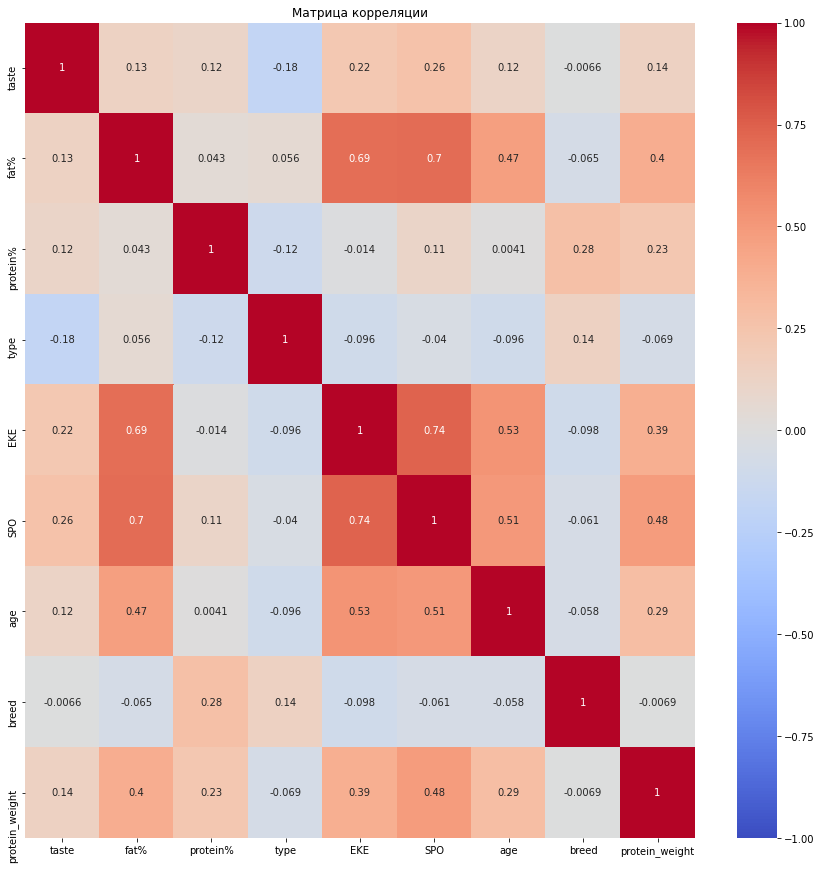

,taste,fat%,protein%,type,EKE,SPO,age,breed,protein_weight
taste,1.000000,0.132821,0.115997,-0.182050,0.222236,0.258950,0.118110,-0.006611,0.143254
fat%,0.132821,1.000000,0.042541,0.055611,0.688273,0.699606,0.472217,-0.064825,0.395286
protein%,0.115997,0.042541,1.000000,-0.115285,-0.013803,0.109788,0.004073,0.278753,0.228104
type,-0.182050,0.055611,-0.115285,1.000000,-0.095800,-0.039546,-0.095931,0.144301,-0.068750
EKE,0.222236,0.688273,-0.013803,-0.095800,1.000000,0.740029,0.526987,-0.098474,0.387436
SPO,0.258950,0.699606,0.109788,-0.039546,0.740029,1.000000,0.506502,-0.061340,0.484731
age,0.118110,0.472217,0.004073,-0.095931,0.526987,0.506502,1.000000,-0.057670,0.290229
breed,-0.006611,-0.064825,0.278753,0.144301,-0.098474,-0.061340,-0.057670,1.000000,-0.006871
protein_weight,0.143254,0.395286,0.228104,-0.068750,0.387436,0.484731,0.290229,-0.006871,1.000000


In [112]:
parametres = [
    'taste',
    'fat%',
    'protein%',
    'type',
    'EKE', #параметр корма- влияет на вкус
    'SPO', #параметр корма- влияет на вкус
    'age', #возраст коровы- влияет на вкус
    'breed', #порода- влияет на вкус
    'protein_weight'] #параметр корма- влияет на вкус



corr_matrix = ferma_mainL[parametres].corr(method='spearman')
plt.figure(figsize = (15, 15))

sns.heatmap(corr_matrix, vmin=-1, vmax=1,
            cmap='coolwarm', annot=True,
            )
plt.title('Матрица корреляции')
plt.show()
display(corr_matrix)

In [113]:
# КОД РЕВЬЮЕРА
ferma_mainL.dtypes

id                  int64
yield             float64
EKE               float64
protein_weight      int64
SPO               float64
breed             float64
type              float64
father_breed       object
fat%              float64
protein%          float64
taste             float64
age               float64
father_name        object
dtype: object

In [114]:

ferma_mainL=ferma_main
ferma_mainL['SPO'] = ferma_mainL['SPO'].apply(a13)

RANDOM_STATE = 42
random.seed(RANDOM_STATE)

X = ferma_mainL.drop(columns='taste')
y = ferma_mainL['taste']
X_train, X_test, y_train, y_test = train_test_split(
X,
y,
random_state=RANDOM_STATE
)

# приводим значения всех признаков к единой шкале
cat_col_names =  ['SPO','age','type']
num_col_names = ['EKE','protein_weight', 'fat%','protein%']




a=X_test[cat_col_names]

encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names_out() # РЕВЬЮЕР: и тут _out()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)



clf1 = LogisticRegression(random_state=RANDOM_STATE)

clf1 = clf1.fit(X_train, y_train)
y_pred = clf1.predict(X_test) 

display(y_pred)

/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1.,
       1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1.,
       1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 1., 0., 0., 1.])

In [115]:
a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 494 to 582
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SPO     158 non-null    object 
 1   age     158 non-null    float64
 2   type    158 non-null    float64
dtypes: float64(2), object(1)
memory usage: 4.9+ KB


In [116]:
print(accuracy_score(y_pred, y_test)) 


recall = recall_score(y_pred,y_test) 
print('recall: ',round(recall ,3))

precision = precision_score(y_test,y_pred) 
print('precision: ',round(precision,3))

0.6835443037974683
recall:  0.724
precision:  0.724


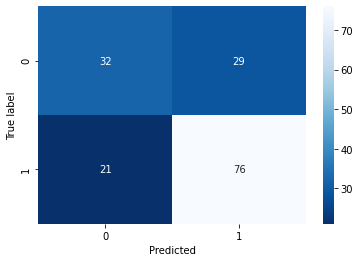

In [117]:

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted'); 

Модель больше подвержена ошибкам первого рода

In [118]:
recall = recall_score(y_pred,y_test, average=None, zero_division=1) 
print('recall: ', recall)

precision = precision_score(y_test,y_pred, average=None, zero_division=1) 
print('precision: ', precision)

recall:  [0.60377358 0.72380952]
precision:  [0.60377358 0.72380952]


In [119]:
# КОД РЕВЬЮЕРА
probas = clf1.predict_proba(X_test)
probas

array([[0.53164158, 0.46835842],
       [0.31715586, 0.68284414],
       [0.37771805, 0.62228195],
       [0.73012569, 0.26987431],
       [0.23909524, 0.76090476],
       [0.20484739, 0.79515261],
       [0.77099127, 0.22900873],
       [0.31310445, 0.68689555],
       [0.23124281, 0.76875719],
       [0.69268967, 0.30731033],
       [0.73803508, 0.26196492],
       [0.4646986 , 0.5353014 ],
       [0.51711719, 0.48288281],
       [0.44842531, 0.55157469],
       [0.53821981, 0.46178019],
       [0.52821183, 0.47178817],
       [0.3557766 , 0.6442234 ],
       [0.17032602, 0.82967398],
       [0.38358912, 0.61641088],
       [0.69036045, 0.30963955],
       [0.46794918, 0.53205082],
       [0.38544311, 0.61455689],
       [0.21593359, 0.78406641],
       [0.71201562, 0.28798438],
       [0.22331268, 0.77668732],
       [0.30943609, 0.69056391],
       [0.41356936, 0.58643064],
       [0.27810629, 0.72189371],
       [0.48050108, 0.51949892],
       [0.3501946 , 0.6498054 ],
       [0.

In [120]:
# КОД РЕВЬЮЕРА
threshold = 0.3
predictions = (probas[:,1] > threshold).astype(int)
print(predictions)

recall = recall_score(y_test, predictions) 
print('recall: ', recall)

precision = precision_score(y_test, predictions) 
print('precision: ', precision)

[1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1]
recall:  0.9896907216494846
precision:  0.6357615894039735


In [121]:
def a111(a):
    threshold = a
    predictions = (probas[:,1] > threshold).astype(int)
    

    recall = recall_score(y_test, predictions) 
    print('recall: ', recall)

    precision = precision_score(y_test, predictions) 
    print('precision: ', precision)

In [122]:
a111(0.45)

recall:  0.8762886597938144
precision:  0.6854838709677419


In [123]:
a111(0.5)

recall:  0.7835051546391752
precision:  0.7238095238095238


In [124]:
a111(0.55)

recall:  0.6701030927835051
precision:  0.7647058823529411


In [125]:
a111(0.60)

recall:  0.5670103092783505
precision:  0.7857142857142857


In [126]:
a111(0.65)

recall:  0.4329896907216495
precision:  0.7924528301886793


In [127]:
a111(0.70)

recall:  0.27835051546391754
precision:  0.8181818181818182


In [128]:
a111(0.75)

recall:  0.18556701030927836
precision:  0.8571428571428571


In [129]:
a111(0.80)

recall:  0.08247422680412371
precision:  0.8888888888888888


In [130]:
a111(0.85)

recall:  0.020618556701030927
precision:  1.0


In [131]:
threshold = 0.75
predictions = (probas[:,1] > threshold).astype(int)
print(predictions)

recall = recall_score(y_test, predictions) 
print('recall: ', recall)

precision = precision_score(y_test, predictions) 
print('precision: ', precision)

[0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 0 0]
recall:  0.18556701030927836
precision:  0.8571428571428571


In [132]:
display(cow_buy)


,breed,type,father_breed,father_name,fat%,protein%,age,yield,SPO,EKE,protein_weight,EKE2
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.08,более_2_лет,6520.566514,0.96,15.31,2017.24,234.25
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.08,менее_2_лет,5842.669039,0.95,14.99,2018.99,224.67
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.07,более_2_лет,5873.170718,0.95,15.33,2017.96,234.87
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.06,более_2_лет,6219.307473,0.95,15.33,2017.96,234.87
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.07,более_2_лет,6167.974036,0.95,15.33,2017.96,234.87
5,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.63,3.05,менее_2_лет,6196.882765,0.95,15.33,2017.96,234.87
6,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.08,более_2_лет,5842.669039,0.95,14.99,2018.99,224.67
7,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.08,менее_2_лет,6219.307473,0.95,15.33,2017.96,234.87
8,Вис Бик Айдиал,Холмистое,Соверин,Соловчик,3.73,3.06,более_2_лет,5625.449315,0.95,14.99,2018.99,224.67
9,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.73,3.07,более_2_лет,6196.882765,0.95,15.33,2017.96,234.87


In [133]:
cow_buy1=cow_buy
cow_buy1['SPO'] = cow_buy1['SPO'].apply(a13)
a12(cow_buy1, 'age', 'менее_2_лет', 'более_2_лет')
cow_buy1['age'] = cow_buy1['age'].astype('float64')

a12(cow_buy1, 'type', 'Холмистое', 'Равнинное')
cow_buy1['type'] = cow_buy1['type'].astype('float64')

In [134]:
#a.info()
cow_buy1[['SPO','age']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 0 to 15
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SPO     16 non-null     object 
 1   age     16 non-null     float64
dtypes: float64(1), object(1)
memory usage: 384.0+ bytes


In [135]:

#ow_buy1=cow_buy1.isna()

cat_col_names = ['SPO','age','type']
num_col_names = ['EKE','protein_weight' ,'fat%','protein%']

#encoder = OneHotEncoder(drop='first', sparse=False)
cow_buy_ohe = encoder.transform(cow_buy1[cat_col_names])
cow_buy_ohe = pd.DataFrame(cow_buy_ohe, columns=encoder_col_names)

encoder_col_names = encoder.get_feature_names_out()

#scaler = StandardScaler()
cow_buy_scaled = scaler.transform(cow_buy1[num_col_names])
cow_buy_scaled = pd.DataFrame(cow_buy_scaled, columns=num_col_names)


cow_buy1111 = pd.concat([cow_buy_ohe, cow_buy_scaled], axis=1)

cow_buy1111.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SPO_1           16 non-null     float64
 1   age_1.0         16 non-null     float64
 2   type_1.0        16 non-null     float64
 3   EKE             16 non-null     float64
 4   protein_weight  16 non-null     float64
 5   fat%            16 non-null     float64
 6   protein%        16 non-null     float64
dtypes: float64(7)
memory usage: 1.0 KB


In [136]:
cow_buy1111.rename(columns = {'SPO_0.96':'SPO_1','EKE2':'EKE','type_Холмистое':'type_1.0'}, inplace = True )
y_pred1 = clf1.predict_proba(cow_buy1111) 
#y_pred1 = clf1.predict(cow_buy1111) 
display(y_pred1)

array([[0.24401273, 0.75598727],
       [0.42528816, 0.57471184],
       [0.54356762, 0.45643238],
       [0.55124561, 0.44875439],
       [0.54853396, 0.45146604],
       [0.84701577, 0.15298423],
       [0.40344885, 0.59655115],
       [0.24770906, 0.75229094],
       [0.61997174, 0.38002826],
       [0.55744841, 0.44255159],
       [0.73830523, 0.26169477],
       [0.27861044, 0.72138956],
       [0.55124561, 0.44875439],
       [0.28309121, 0.71690879],
       [0.85414448, 0.14585552],
       [0.55626699, 0.44373301]])

In [137]:
threshold=0.75
#pred = (y_pred1[:] > threshold).astype(int)
pred = (y_pred1[:,1] > threshold).astype(int)
display(pred)

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [138]:

cow_buy['taste']= pd.Series(pred)

#cow_buy['taste']= pd.Series(y_pred1)
#ferma_main['taste'] = ferma_main['taste'].astype('str')

#cow_buy['taste'] = cow_buy['taste'].replace('1','вкусно')
#cow_buy['taste'] = cow_buy['taste'].replace('0','не вкусно')
cow_buy.loc[cow_buy['taste'] == 1, "taste"] ='вкусно'
cow_buy.loc[cow_buy['taste'] == 0, "taste"] ='не вкусно'

In [139]:

display(cow_buy)

,breed,type,father_breed,father_name,fat%,protein%,age,yield,SPO,EKE,protein_weight,EKE2,taste
0,Вис Бик Айдиал,0.0,Айдиал,Геркулес,3.58,3.08,1.0,6520.566514,1,15.31,2017.24,234.25,вкусно
1,Вис Бик Айдиал,1.0,Соверин,Буйный,3.54,3.08,0.0,5842.669039,1,14.99,2018.99,224.67,не вкусно
2,РефлешнСоверинг,1.0,Соверин,Барин,3.59,3.07,1.0,5873.170718,1,15.33,2017.96,234.87,не вкусно
3,РефлешнСоверинг,0.0,Айдиал,Буйный,3.40,3.06,1.0,6219.307473,1,15.33,2017.96,234.87,не вкусно
4,РефлешнСоверинг,1.0,Айдиал,Буйный,3.64,3.07,1.0,6167.974036,1,15.33,2017.96,234.87,не вкусно
5,РефлешнСоверинг,1.0,Соверин,Геркулес,3.63,3.05,0.0,6196.882765,1,15.33,2017.96,234.87,не вкусно
6,Вис Бик Айдиал,1.0,Соверин,Буйный,3.57,3.08,1.0,5842.669039,1,14.99,2018.99,224.67,не вкусно
7,РефлешнСоверинг,0.0,Айдиал,Буйный,3.40,3.08,0.0,6219.307473,1,15.33,2017.96,234.87,вкусно
8,Вис Бик Айдиал,0.0,Соверин,Соловчик,3.73,3.06,1.0,5625.449315,1,14.99,2018.99,224.67,не вкусно
9,РефлешнСоверинг,1.0,Соверин,Геркулес,3.73,3.07,1.0,6196.882765,1,15.33,2017.96,234.87,не вкусно


In [140]:
cols1 = list(cow_buy.columns)
a1, b1 = cols1.index('SPO'), cols1.index('taste')
cols1[b1], cols1[a1] = cols1[a1], cols1[b1]
cow_buy = cow_buy[cols1]



In [141]:
cow_buy=cow_buy.sort_values(by='yield', ascending= False)
cow_buy=cow_buy.dropna()

<b>Вывод:</b>  
Оценивали обученную модель мы с помощью: 1. Метрики accuracy 2. Confusion Matrix 3. Precision и recall
На основе признаков заданных после их выбора матрицей корреляции мы обучили логистическую модель.  
После этого модель была применеа к фрейму с покупаемым товаром, на основе предсказаний после данного действия был заполнен столбец с показателем вкуса молока.



## Итоговые выводы

Спрогнозированные показатели удоя и вкуса:


In [142]:
display(cow_buy[['yield','taste']])

,yield,taste
0,6520.566514,вкусно
10,6520.566514,не вкусно
3,6219.307473,не вкусно
7,6219.307473,вкусно
12,6219.307473,не вкусно
5,6196.882765,не вкусно
9,6196.882765,не вкусно
14,6196.882765,не вкусно
4,6167.974036,не вкусно
2,5873.170718,не вкусно


Итоговый списко коров с предсказанным удоем и вкусом молока.   
Как можно заметить в среднем показатели у предлогаемых к покупке коров меньше чем у тех что уже находятся в хозяйстве, однако разница не велика.  

In [143]:
cow_buy= cow_buy.loc[cow_buy['yield'] >= 6000]
cow_buy= cow_buy.loc[cow_buy['taste'] != 'не вкусно']
display(cow_buy)

,breed,type,father_breed,father_name,fat%,protein%,age,yield,taste,EKE,protein_weight,EKE2,SPO
0,Вис Бик Айдиал,0.0,Айдиал,Геркулес,3.58,3.08,1.0,6520.566514,вкусно,15.31,2017.24,234.25,1
7,РефлешнСоверинг,0.0,Айдиал,Буйный,3.40,3.08,0.0,6219.307473,вкусно,15.33,2017.96,234.87,1


После фильтрования можно сделать вывод о том что заказчик может приобрести двух коров с id: 0,7. Так как их удой больше 6000 литров и молоко оценивается как вкусное.

Дополнительными рекомендациями может послужить покупка коров с чуть менььшим удоем и изменение их комовых показателей, что позволит увеличить удой и вкусовые качества, после чего они также начнут укладываться в рамки требованийй предъявляемых к товару.

Также заказчику следует обратить внимание на параметры корма и распределение коров по пастбищами, в частности постараться перевести коров с равнинных пастбищ на холмистые, ведь это положительно влияет на вкус.   
Параметры корма же напрямую влияют на вкус и удой, поэтому улучшение диеты сможет еще повысить производительность питомцев.

Выводы по линейному анализу:  
На основе трех последовательно обученных моделей можно сделать вывод о признаках важных для показателя удоя. Для этого мы испольовали несколько методов (вводили доп. характеристики, изменяли признаки используемые в анализе, устраняли нелинейность, преобразовывали данные)   
Сравнение эффективности моделей производилось на основе метрик mae, mse, rmse и r2. после чего была выбрана финальная версия, на основе которой и проводилось предсказание для продукта.

Выводы по логитическому анализу:  
Оценивали обученную модель мы с помощью: 1. Метрики accuracy 2. Confusion Matrix 3. Precision и recall
На основе признаков заданных после их выбора матрицей корреляции мы обучили логистическую модель.  
После этого модель была применеа к фрейму с покупаемым товаром, на основе предсказаний после данного действия был заполнен столбец с показателем вкуса молока.

Мне кажется что точность аналитической модели можно улучшить если в фрейме данных, которые предоставляет продавец изначально будет более полная информация о продаваемых коровах, а также большее количество разных особей, это позволит увеличить выборки и быть более уверенным в используемых для анализа данных